In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import scipy
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
from scipy import stats
from sklearn.datasets import load_breast_cancer
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [2]:
c_list = ["#A63130", "#D54A38", "#EDB74D", "#A0B87B", "#46966E", "#306884"]
new_cmap = LinearSegmentedColormap.from_list('sci_standard', c_list)

In [3]:
def plot_heatmap(data, lane_index, tag, mpr):

    va_col = f"speed_{lane_index}"
    pos_col = f"pos_{lane_index}"
    time_col = f"time_stamp_{lane_index}"

    data = data[[va_col, pos_col, time_col]]
    data = data.dropna()
    data = data[data[time_col] >= 0]
    data[time_col] = data[time_col].astype(int)

    # Set the number of bins for the grid
    num_bins_time = 200
    num_bins_pos = 400
    
    # Calculate the average speed for each bin
    h, xedges, yedges, binnumbers = scipy.stats.binned_statistic_2d(
        data[time_col], 
        data[pos_col], 
        data[va_col], 
        statistic='mean', 
        bins=[num_bins_time, num_bins_pos]
    )

    # Calculate the overall mean speed of the dataset
    overall_mean_speed = np.mean(data[va_col])
    print("overall_mean_speed:", overall_mean_speed)

    # Fill the empty bins with the overall mean speed
    h[np.isnan(h)] = overall_mean_speed

    cmap = new_cmap
    cmap = cmap.with_extremes(bad=cmap(0))
    plt.figure(figsize=(14, 4))
    plt.ylim(300, 3250)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Plot the heatmap using the calculated average speeds
    pcm = plt.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         rasterized=True, vmin=0, vmax=33)
    
    cbar = plt.colorbar(pcm, label="Speed (m/s)", pad=0)
    cbar.set_label('Speed (m/s)', fontsize=25)
    # Set the font size of colorbar ticks
    cbar.ax.tick_params(labelsize=20)

    plt.xlabel('Time (s)', fontsize=25)  # Set the x-axis label
    plt.ylabel('Position (m)', fontsize=25)  # Set the y-axis label
    plt.title(f"MPR={mpr}%", fontsize=25)  # Set the title with MPR value
    plt.show()

overall_mean_speed: 25.284012051101453


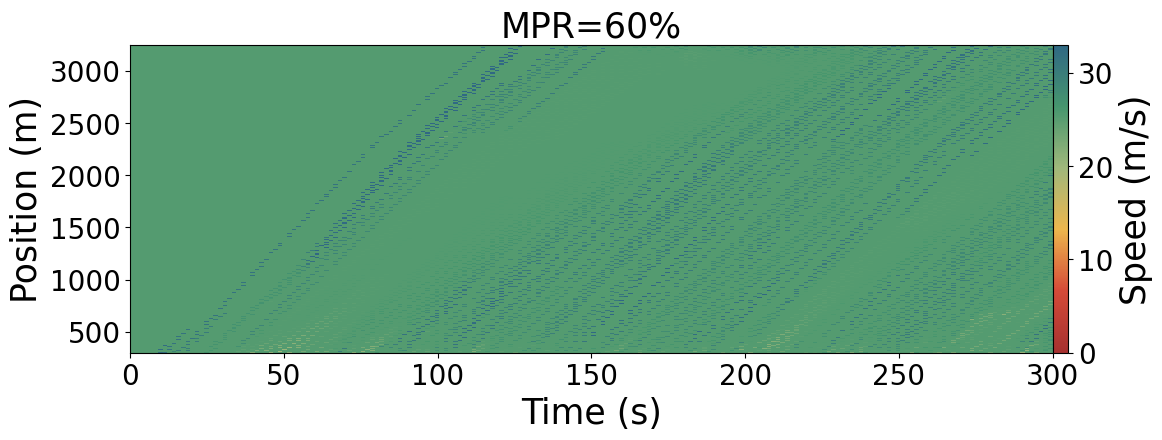

In [36]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_5_time_300.csv')
plot_heatmap(data, 'left', "mpr_60_platoon_54_5", 60)

overall_mean_speed: 24.117277335641102


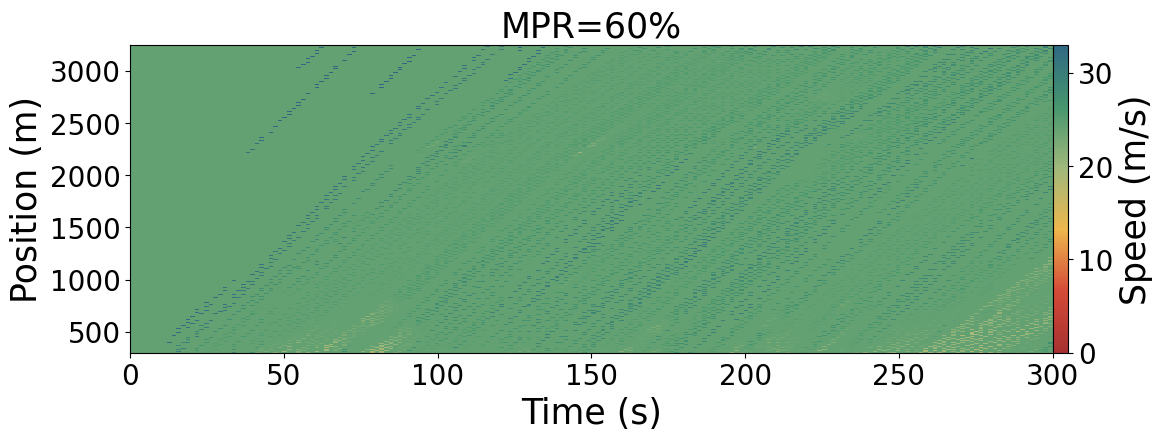

In [37]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_5_time_300.csv')
plot_heatmap(data, 'middle', "mpr_60_platoon_54_5", 60)

overall_mean_speed: 23.26161031111931


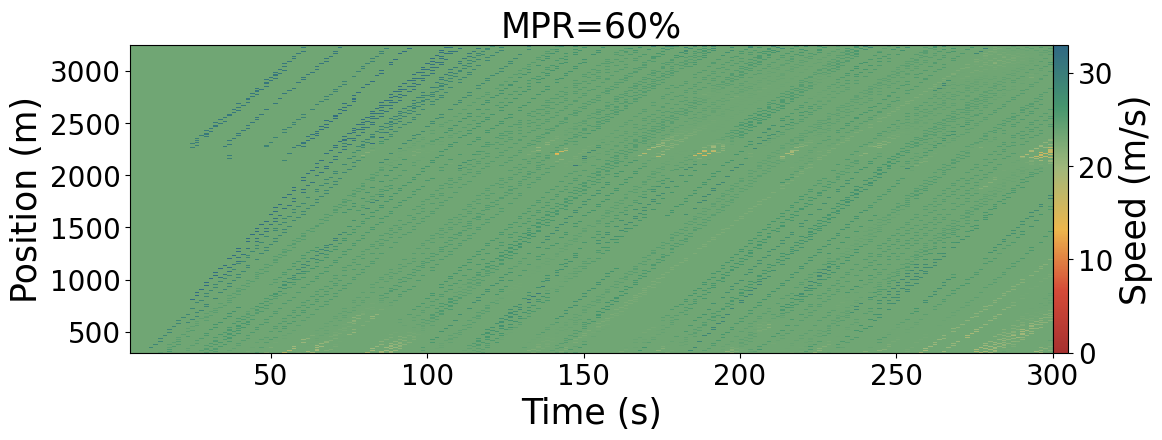

In [38]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_5_time_300.csv')
plot_heatmap(data, 'right', "mpr_60_platoon_54_5", 60)

---

overall_mean_speed: 25.178380771411167


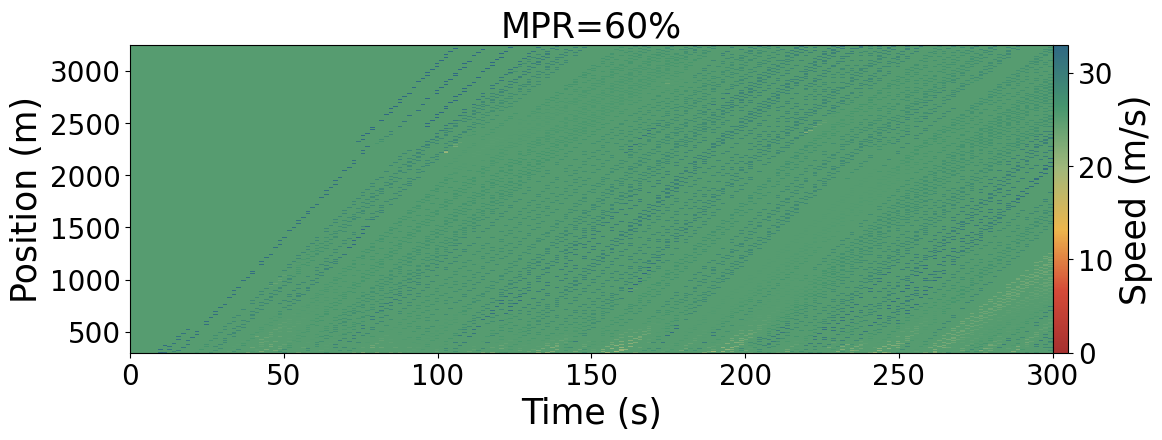

In [39]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_12_time_300.csv')
plot_heatmap(data, 'left', "mpr_60_platoon_54_12", 60)

overall_mean_speed: 24.310055660681353


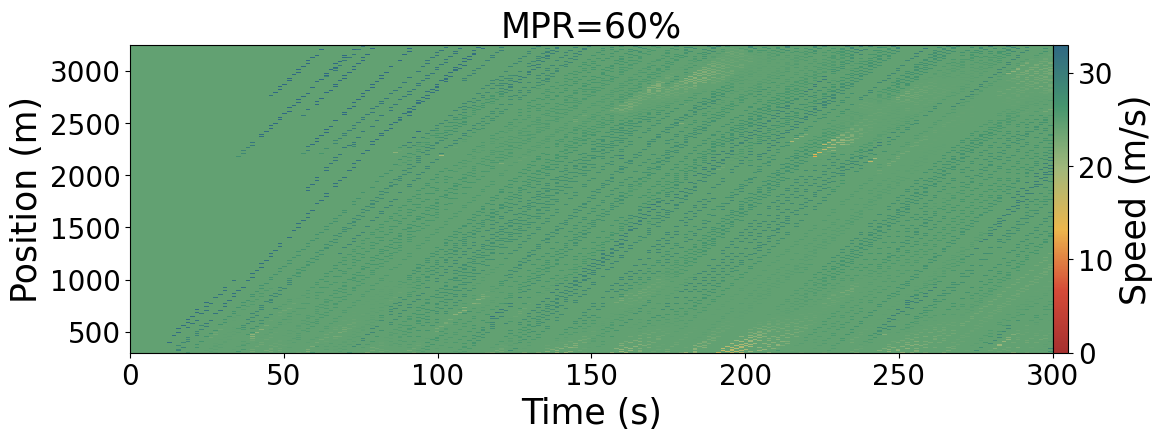

In [40]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_12_time_300.csv')
plot_heatmap(data, 'middle', "mpr_60_platoon_54_12", 60)

overall_mean_speed: 22.25659143347933


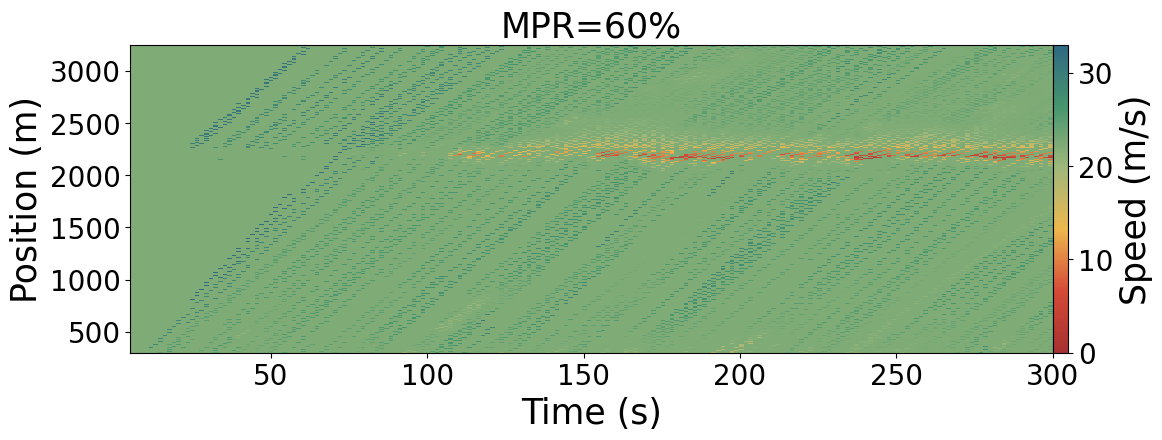

In [41]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_12_time_300.csv')
plot_heatmap(data, 'right', "mpr_60_platoon_54_12", 60)

---

overall_mean_speed: 25.32706267982761


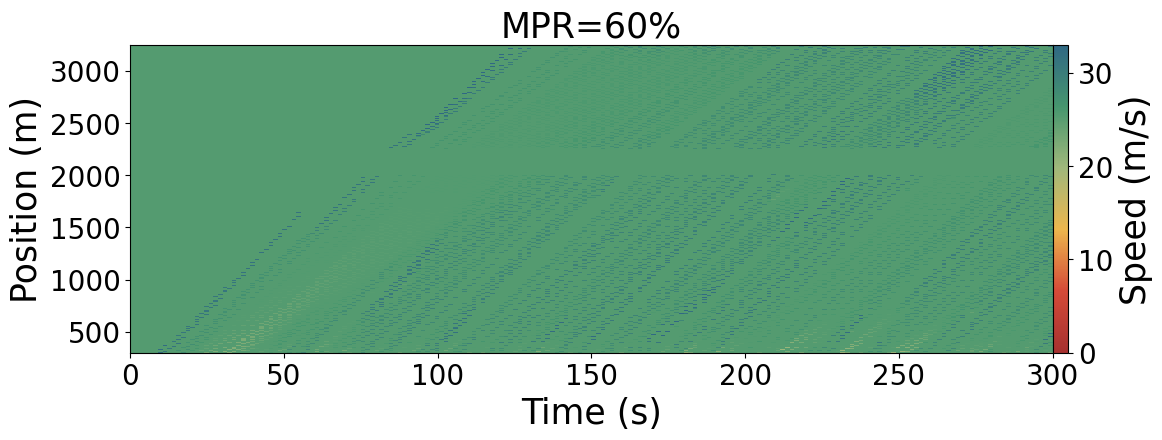

In [4]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_12_time_300_without_ramp.csv')
plot_heatmap(data, 'left', "mpr_60_platoon_54_5", 60)

overall_mean_speed: 24.167736973616858


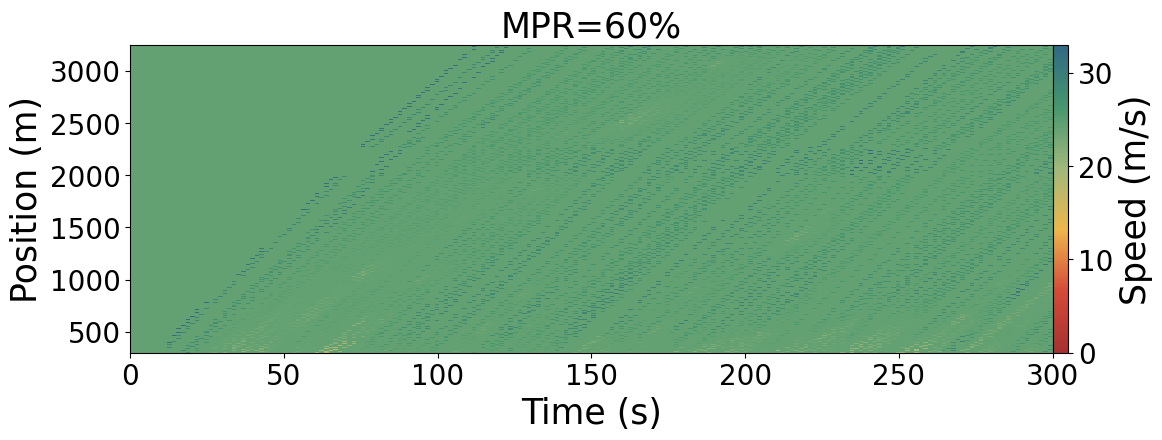

In [5]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_12_time_300_without_ramp.csv')
plot_heatmap(data, 'middle', "mpr_60_platoon_54_5", 60)

overall_mean_speed: 23.31497056862761


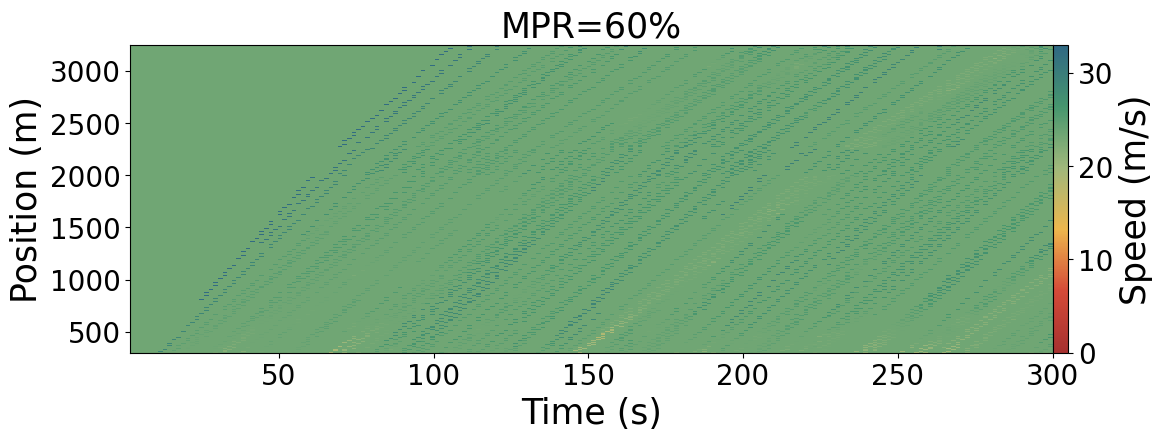

In [6]:
data = pd.read_csv('../data/base_info_data/base_info_mpr_60_flow_54_12_time_300_without_ramp.csv')
plot_heatmap(data, 'right', "mpr_60_platoon_54_5", 60)